<a href="https://colab.research.google.com/github/hashishsoni/daily_ml_practice/blob/main/Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
! pip install cryptocmd

In [215]:
from datetime import datetime, timedelta, date
from cryptocmd import CmcScraper
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [216]:
### List of Constants to be Used for Analysis
### Analysis Start Date and End Date
end_date_is   = date.today()
start_date_is = end_date_is +  timedelta(days = -15)

### Convert the End Date and Start Date to String
end_date_is = str(end_date_is.strftime('%d-%m-%Y'))
start_date_is = str(start_date_is.strftime('%d-%m-%Y'))

In [217]:
list_crypto = ["BTC","ETH","USDT","BNB","ADA","XRP","DOGE","DOT","ICP","BCH","UNI","USDC","LTC","LINK","SOL","XLM","MATIC","BUSD","ETC","VET","WBTC","THETA"]
timepoint_data = 3

In [218]:
### Initializing the Data frame to store the price of nifty 50 stocks
crypto_cash_data_colnames = ['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'MarketCap', 'PrevClose', 'VolumeMA5', 'MarketCapMA5']
crypto_cash_data = pd.DataFrame(columns = crypto_cash_data_colnames)

In [219]:
for crypto in list_crypto:
    # initialise scraper with time interval
    scraper = CmcScraper(crypto, start_date_is, end_date_is)

    # get raw data as list of list
    headers, data = scraper.get_data()

    # get data in a json format
    json_data = scraper.get_data("json")

    # get dataframe for the data
    df = scraper.get_dataframe()
    df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'MarketCap']
    df.sort_values(by=['Date'], inplace=True)
    df['PrevClose'] = df['Close'].shift(1)
    df['VolumeMA5'] = round(df['Volume'].rolling(window=5).mean(),2)
    df['MarketCapMA5'] = round(df['MarketCap'].rolling(window=5).mean(),2)

    df['Symbol'] = crypto
    df = df[-(timepoint_data):]

    crypto_cash_data = pd.concat([crypto_cash_data, df])

crypto_cash_data.set_index('Date', drop=True, inplace=True)

        Date          Open          High  ...     VolumeMA5  MarketCapMA5  Symbol
2 2021-05-18  43488.057988  45812.458408  ...  6.200748e+10  8.590326e+11     BTC
1 2021-05-19  42944.975447  43546.116485  ...  7.613160e+10  8.108677e+11     BTC
0 2021-05-20  36753.669708  42462.984986  ...  8.195578e+10  7.885207e+11     BTC

[3 rows x 11 columns]
        Date         Open         High  ...     VolumeMA5  MarketCapMA5  Symbol
2 2021-05-18  3276.872339  3562.465160  ...  4.648687e+10  4.164835e+11     ETH
1 2021-05-19  3382.657150  3437.935788  ...  5.374859e+10  3.790105e+11     ETH
0 2021-05-20  2439.638699  2993.145183  ...  5.878630e+10  3.592582e+11     ETH

[3 rows x 11 columns]
        Date      Open      High  ...     VolumeMA5  MarketCapMA5  Symbol
2 2021-05-18  0.999983  1.001995  ...  1.575406e+11  5.813187e+10    USDT
1 2021-05-19  1.000620  1.001999  ...  1.818202e+11  5.826800e+10    USDT
0 2021-05-20  1.001725  1.001996  ...  1.904500e+11  5.824930e+10    USDT

[3 rows x

In [220]:
crypto_cash_data_sample = crypto_cash_data[crypto_cash_data.index == '2021-05-20']

In [221]:
crypto_cash_data_sample

,Symbol,Open,High,Low,Close,Volume,MarketCap,PrevClose,VolumeMA5,MarketCapMA5
Date,,,,,,,,,,
2021-05-20,BTC,36753.669708,42462.984986,35050.615825,40782.738262,8.828194e+10,7.631959e+11,37002.440466,8.195578e+10,7.885207e+11
2021-05-20,ETH,2439.638699,2993.145183,2170.229058,2784.294158,6.761083e+10,3.228574e+11,2460.679200,5.878630e+10,3.592582e+11
2021-05-20,USDT,1.001725,1.001996,1.000888,1.001852,2.033892e+11,5.812697e+10,1.001616,1.904500e+11,5.824930e+10
2021-05-20,BNB,335.556736,424.294254,286.089445,393.612770,7.093839e+09,6.039315e+10,339.025486,5.718565e+09,7.105339e+10
2021-05-20,ADA,1.471961,1.943229,1.327412,1.810469,1.178852e+10,5.784142e+10,1.482521,1.172431e+10,6.158350e+10
2021-05-20,XRP,1.061533,1.268449,0.911814,1.185537,1.362666e+10,5.469517e+10,1.070313,1.499522e+10,5.033025e+10
2021-05-20,DOGE,0.330252,0.433192,0.296253,0.400194,1.241548e+10,5.189730e+10,0.333123,9.832678e+09,5.736279e+10
2021-05-20,DOT,25.060495,31.229703,21.279379,29.150569,6.694931e+09,2.738615e+10,25.227142,5.945416e+09,3.311885e+10
2021-05-20,ICP,122.945610,222.144088,104.153828,165.561834,1.766367e+09,2.052134e+10,124.280619,7.079811e+08,2.169712e+10


In [222]:
### Calculating the No. of Trades ratio as a percentage of the last 5 days
crypto_cash_data['VolumeRatio'] = crypto_cash_data['Volume']/crypto_cash_data['VolumeMA5']
crypto_cash_data['VolumeRatio'] = crypto_cash_data['VolumeRatio'].apply(lambda x: round(x,2))

crypto_cash_data['MarketCapRatio'] = crypto_cash_data['MarketCap']/crypto_cash_data['MarketCapMA5']
crypto_cash_data['MarketCapRatio'] = crypto_cash_data['MarketCapRatio'].apply(lambda x: round(x,2))

### Calculating the High Low Gap as a percentage of the last Closing Price
crypto_cash_data['HLGAP%'] = (crypto_cash_data["High"]-crypto_cash_data['Low'])*100/crypto_cash_data['PrevClose']
crypto_cash_data['HLGAP%'] = crypto_cash_data['HLGAP%'].apply(lambda x: round(x,2))

crypto_cash_data['Change%'] = (crypto_cash_data["Close"]-crypto_cash_data['PrevClose'])*100/crypto_cash_data['PrevClose']
crypto_cash_data['Change%'] = crypto_cash_data['Change%'].apply(lambda x: round(x,2))

In [223]:
crypto_cash_data.head()

,Symbol,Open,High,Low,Close,Volume,MarketCap,PrevClose,VolumeMA5,MarketCapMA5,VolumeRatio,MarketCapRatio,HLGAP%,Change%
Date,,,,,,,,,,,,,,
2021-05-18,BTC,43488.057988,45812.458408,42367.831453,42909.400925,5.618737e+10,8.029743e+11,43537.511389,6.200748e+10,8.590326e+11,0.91,0.93,7.91,-1.44
2021-05-19,BTC,42944.975447,43546.116485,30681.496912,37002.440466,1.263581e+11,6.924526e+11,42909.400925,7.613160e+10,8.108677e+11,1.66,0.85,29.98,-13.77
2021-05-20,BTC,36753.669708,42462.984986,35050.615825,40782.738262,8.828194e+10,7.631959e+11,37002.440466,8.195578e+10,7.885207e+11,1.08,0.97,20.03,10.22
2021-05-18,ETH,3276.872339,3562.465160,3246.404084,3380.070093,4.041653e+10,3.918503e+11,3282.397796,4.648687e+10,4.164835e+11,0.87,0.94,9.63,2.98
2021-05-19,ETH,3382.657150,3437.935788,1952.460232,2460.679200,8.448291e+10,2.852987e+11,3380.070093,5.374859e+10,3.790105e+11,1.57,0.75,43.95,-27.20


In [224]:
sample_dataset = crypto_cash_data[['Symbol', 'VolumeRatio', 'HLGAP%', 'MarketCapRatio', 'Change%']]
sample_dataset.reset_index()

,Date,Symbol,VolumeRatio,HLGAP%,MarketCapRatio,Change%
0,2021-05-18,BTC,0.91,7.91,0.93,-1.44
1,2021-05-19,BTC,1.66,29.98,0.85,-13.77
2,2021-05-20,BTC,1.08,20.03,0.97,10.22
3,2021-05-18,ETH,0.87,9.63,0.94,2.98
4,2021-05-19,ETH,1.57,43.95,0.75,-27.20
...,...,...,...,...,...,...
61,2021-05-19,WBTC,2.48,30.03,0.86,-14.15
62,2021-05-20,WBTC,1.34,19.90,0.97,10.17
63,2021-05-18,THETA,0.85,8.63,1.01,1.03
64,2021-05-19,THETA,1.93,60.28,0.68,-39.00


In [225]:
sample_dataset['index1'] = sample_dataset.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [226]:
sample_dataset

,Symbol,VolumeRatio,HLGAP%,MarketCapRatio,Change%,index1
Date,,,,,,
2021-05-18,BTC,0.91,7.91,0.93,-1.44,2021-05-18
2021-05-19,BTC,1.66,29.98,0.85,-13.77,2021-05-19
2021-05-20,BTC,1.08,20.03,0.97,10.22,2021-05-20
2021-05-18,ETH,0.87,9.63,0.94,2.98,2021-05-18
2021-05-19,ETH,1.57,43.95,0.75,-27.20,2021-05-19
...,...,...,...,...,...,...
2021-05-19,WBTC,2.48,30.03,0.86,-14.15,2021-05-19
2021-05-20,WBTC,1.34,19.90,0.97,10.17,2021-05-20
2021-05-18,THETA,0.85,8.63,1.01,1.03,2021-05-18


In [227]:
sample_dataset = sample_dataset.pivot(index='Symbol',columns='index1')[['VolumeRatio', 'HLGAP%', 'MarketCapRatio', 'Change%']]
sample_dataset

VolumeRatio                        ...    Change%                      
index1  2021-05-18 2021-05-19 2021-05-20  ... 2021-05-18 2021-05-19 2021-05-20
Symbol                                    ...                                 
ADA           0.63       1.31       1.01  ...      -1.41     -26.01      22.12
BCH           0.85       1.59       1.17  ...       2.14     -35.25      16.24
BNB           0.89       1.76       1.24  ...      -0.77     -33.27      16.10
BTC           0.91       1.66       1.08  ...      -1.44     -13.77      10.22
BUSD          0.92       1.72       1.19  ...      -0.02      -0.01      -0.00
DOGE          0.46       1.62       1.26  ...      -2.41     -30.03      20.13
DOT           0.78       1.71       1.13  ...       5.00     -37.93      15.55
ETC           0.76       1.24       1.14  ...      -1.40     -32.20      23.18
ETH           0.87       1.57       1.15  ...       2.98     -27.20      13.15
ICP           0.97       1.48       2.49  ...     -16.12     -24.39      33.22
LINK          1.15       1.66       1.11  ...      14.39     -37.24      15.28
LTC           1.20       1.56       1.06  ...       4.56     -35.67      12.01
MATIC         1.68       1.54       0.94  ...      42.04     -32.39      10.97
SOL           1.45       1.50       1.11  ...      19.31     -37.21      27.45
THETA         0.85       1.93       1.24  ...       1.03     -39.00      22.66
UNI           0.94       1.89       1.08  ...       5.37     -33.20      12.66
USDC          0.88       1.80       1.10  ...      -0.01      -0.01      -0.00
USDT          0.89       1.53       1.07  ...       0.09       0.09       0.02
VET           0.85       1.65       1.12  ...       2.57     -33.57      22.41
WBTC          0.87       2.48       1.34  ...      -1.01     -14.15      10.17
XLM           0.72       1.07       0.75  ...       0.23     -30.39      10.47
XRP           1.20       1.37       0.91  ...       6.31     -32.72      10.77

[22 rows x 12 columns]

In [228]:
sample_dataset['Symbol'] = sample_dataset.index
sample_dataset = sample_dataset.reset_index(drop=True)

In [229]:
sample_dataset.head()

VolumeRatio                      ...             Change% Symbol
index1 2021-05-18 00:00:00 2021-05-19 00:00:00  ... 2021-05-20 00:00:00       
0                     0.63                1.31  ...               22.12    ADA
1                     0.85                1.59  ...               16.24    BCH
2                     0.89                1.76  ...               16.10    BNB
3                     0.91                1.66  ...               10.22    BTC
4                     0.92                1.72  ...               -0.00   BUSD

[5 rows x 13 columns]

In [230]:
var_names = ['VR','HL','MCR','CH']
colnames_sample_dataset = []
for j in var_names:
    for i in range(timepoint_data):
        colnames_sample_dataset.append(j+str(i+1))

sample_dataset.columns = colnames_sample_dataset +['Symbol']

In [231]:
sample_dataset.head()

,VR1,VR2,VR3,HL1,HL2,HL3,MCR1,MCR2,MCR3,CH1,CH2,CH3,Symbol
0,0.63,1.31,1.01,8.40,49.91,41.54,0.95,0.74,0.94,-1.41,-26.01,22.12,ADA
1,0.85,1.59,1.17,10.28,55.22,34.02,0.94,0.68,0.85,2.14,-35.25,16.24,BCH
2,0.89,1.76,1.24,7.27,45.72,40.77,0.92,0.68,0.85,-0.77,-33.27,16.10,BNB
3,0.91,1.66,1.08,7.91,29.98,20.03,0.93,0.85,0.97,-1.44,-13.77,10.22,BTC
4,0.92,1.72,1.19,0.19,0.28,0.15,1.00,1.00,1.00,-0.02,-0.01,-0.00,BUSD


In [232]:
### Principal Component Analysis based on Delivery Ratio, High and Low Gap, Trade Ratio, and Price Change
features1 = colnames_sample_dataset

pca_analysis_1 = sample_dataset

x = pca_analysis_1.loc[:, features1].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

finalDf = pd.concat([principalDf, pca_analysis_1[['Symbol']]], axis = 1)

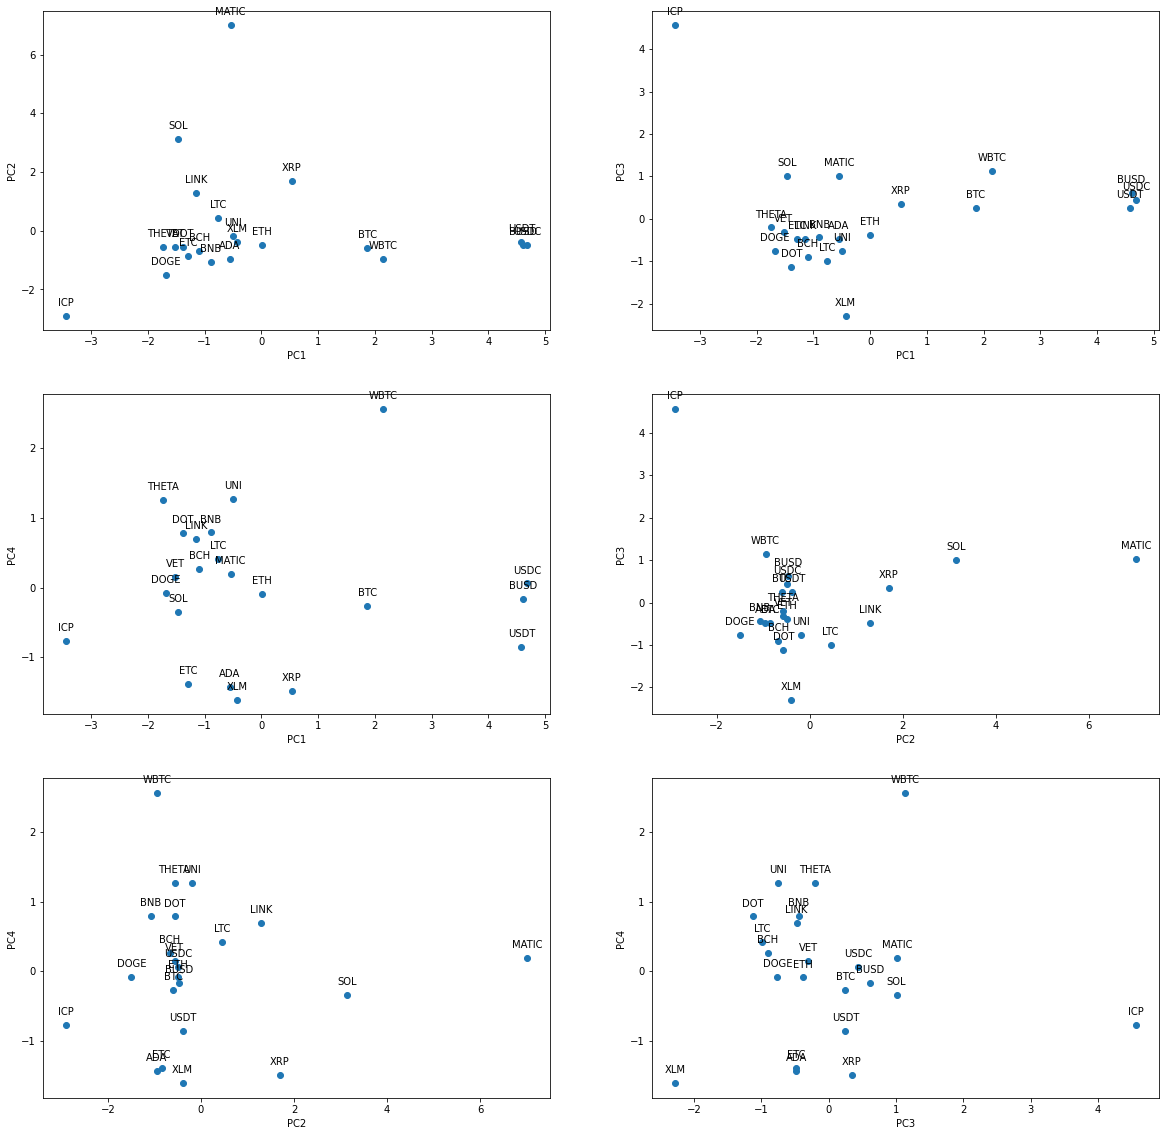

In [233]:
### Plotting the results of different principal components to identify the stock that are behaving differently than the others

fig, axs = plt.subplots(3, 2, figsize=(20, 20))

### This section plots the graph between the 1st Principal Component and 2nd Pincipal Component
axs[0,0].scatter(finalDf['PC1'], finalDf['PC2'])
axs[0,0].set_xlabel('PC1')
axs[0,0].set_ylabel('PC2')
i = 0
labels = finalDf['Symbol'].tolist()
for x,y in zip(finalDf['PC1'], finalDf['PC2']):
    label = labels[i]
    i = i +1
    axs[0,0].annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')


### This section plots the graph between the 1st Principal Component and 3rd Pincipal Component
axs[0,1].scatter(finalDf['PC1'], finalDf['PC3'])
axs[0,1].set_xlabel('PC1')
axs[0,1].set_ylabel('PC3')
i = 0
labels = finalDf['Symbol'].tolist()
for x,y in zip(finalDf['PC1'], finalDf['PC3']):
    label = labels[i]
    i = i +1
    axs[0,1].annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')


### This section plots the graph between the 1st Principal Component and 4th Pincipal Component
axs[1,0].scatter(finalDf['PC1'], finalDf['PC4'])
axs[1,0].set_xlabel('PC1')
axs[1,0].set_ylabel('PC4')
i = 0
labels = finalDf['Symbol'].tolist()
for x,y in zip(finalDf['PC1'], finalDf['PC4']):
    label = labels[i]
    i = i +1
    axs[1,0].annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')


### This section plots the graph between the 2nd Principal Component and 3rd Pincipal Component
axs[1,1].scatter(finalDf['PC2'], finalDf['PC3'])
axs[1,1].set_xlabel('PC2')
axs[1,1].set_ylabel('PC3')
i = 0
labels = finalDf['Symbol'].tolist()
for x,y in zip(finalDf['PC2'], finalDf['PC3']):
    label = labels[i]
    i = i +1
    axs[1,1].annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')


### This section plots the graph between the 2nd Principal Component and 4th Pincipal Component
axs[2,0].scatter(finalDf['PC2'], finalDf['PC4'])
axs[2,0].set_xlabel('PC2')
axs[2,0].set_ylabel('PC4')
i = 0
labels = finalDf['Symbol'].tolist()
for x,y in zip(finalDf['PC2'], finalDf['PC4']):
    label = labels[i]
    i = i +1
    axs[2,0].annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')


### This section plots the graph between the 3rd Principal Component and 4th Pincipal Component
axs[2,1].scatter(finalDf['PC3'], finalDf['PC4'])
axs[2,1].set_xlabel('PC3')
axs[2,1].set_ylabel('PC4')
i = 0
labels = finalDf['Symbol'].tolist()
for x,y in zip(finalDf['PC3'], finalDf['PC4']):
    label = labels[i]
    i = i +1
    axs[2,1].annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

In [234]:
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from matplotlib import pyplot

In [235]:
### Dataset for Cluster Analysis
features_clustering = features1
cluster_analysis_dataset = sample_dataset
X = cluster_analysis_dataset.loc[:, features_clustering].values

In [236]:
### Affinity Propagation
model = AffinityPropagation(damping=0.9)
model.fit(X)
yhat = model.predict(X)
clusters = unique(yhat)
ClusterDF = pd.DataFrame(data = yhat, columns = ['yhat'])
ClusteredDataset = pd.concat([cluster_analysis_dataset.loc[:, features_clustering], finalDf[['Symbol']],ClusterDF], axis = 1)


# ### Plotting the Graph
# xs = ClusteredDataset['DR1']
# ys = ClusteredDataset['DR2']

# fig, axs = plt.subplots(1, figsize=(10, 10))

# for cluster in clusters:
#     row_ix = where(yhat == cluster)
#     axs.scatter(X[row_ix,0], X[row_ix,1])

# ### This section plots the graph between the DR1 and DR2
# axs.set_xlabel('DR1')
# axs.set_ylabel('DR2')
# i = 0
# labels = ClusteredDataset['Symbol'].tolist()
# for x,y in zip(xs,ys):
#     label = labels[i]
#     i = i +1
#     axs.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

### No. of stocks in each cluster
ClusteredDataset['yhat'] = ClusteredDataset['yhat'].apply(lambda x: str(x))
Cluster_numbers = list(ClusteredDataset['yhat'].unique())
no_of_records_in_cluster = {i:0 for i in Cluster_numbers}

for key in no_of_records_in_cluster.keys():
    no_of_records_in_cluster[key] = len(ClusteredDataset[ClusteredDataset['yhat'] == key])
    
### List of Stocks based on Affinity Propagation
min_val = min(no_of_records_in_cluster.values())
min_val_keys = [key for key in no_of_records_in_cluster if no_of_records_in_cluster[key] == min_val]
Stock_affinity_Affinity_prop = ClusteredDataset[ClusteredDataset.yhat.isin(min_val_keys)]['Symbol'].tolist()

NO_OF_CLUSETRS = len(Cluster_numbers)

In [237]:
### Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=NO_OF_CLUSETRS)
model.fit(X)
yhat = model.fit_predict(X)
clusters = unique(yhat)
ClusterDF = pd.DataFrame(data = yhat, columns = ['yhat'])
ClusteredDataset = pd.concat([cluster_analysis_dataset.loc[:, features_clustering], finalDf[['Symbol']],ClusterDF], axis = 1)


# ### Plotting the Graph
# xs = ClusteredDataset['DR1']
# ys = ClusteredDataset['DR2']

# fig, axs = plt.subplots(1, figsize=(10, 10))

# for cluster in clusters:
#     row_ix = where(yhat == cluster)
#     axs.scatter(X[row_ix,0], X[row_ix,1])

# ### This section plots the graph between the DR1 and DR2
# axs.set_xlabel('DR1')
# axs.set_ylabel('DR2')
# i = 0
# labels = ClusteredDataset['Symbol'].tolist()
# for x,y in zip(xs,ys):
#     label = labels[i]
#     i = i +1
#     axs.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

### No. of stocks in each cluster
ClusteredDataset['yhat'] = ClusteredDataset['yhat'].apply(lambda x: str(x))
Cluster_numbers = list(ClusteredDataset['yhat'].unique())
no_of_records_in_cluster = {i:0 for i in Cluster_numbers}

for key in no_of_records_in_cluster.keys():
    no_of_records_in_cluster[key] = len(ClusteredDataset[ClusteredDataset['yhat'] == key])
    
### List of Stocks based on Agglomerative Clustering
min_val = min(no_of_records_in_cluster.values())
min_val_keys = [key for key in no_of_records_in_cluster if no_of_records_in_cluster[key] == min_val]
Stock_affinity_agg_clust = ClusteredDataset[ClusteredDataset.yhat.isin(min_val_keys)]['Symbol'].tolist()

In [238]:
### BIRCH Clustering
model = Birch(threshold=0.01, n_clusters=NO_OF_CLUSETRS)
model.fit(X)
yhat = model.predict(X)
clusters = unique(yhat)
ClusterDF = pd.DataFrame(data = yhat, columns = ['yhat'])
ClusteredDataset = pd.concat([cluster_analysis_dataset.loc[:, features_clustering], finalDf[['Symbol']],ClusterDF], axis = 1)

# xs = ClusteredDataset['DR1']
# ys = ClusteredDataset['DR2']

# fig, axs = plt.subplots(1, figsize=(10, 10))

# for cluster in clusters:
#     row_ix = where(yhat == cluster)
#     axs.scatter(X[row_ix,0], X[row_ix,1])

# ### This section plots the graph between the 2nd Principal Component and 4th Pincipal Component
# axs.set_xlabel('DR1')
# axs.set_ylabel('DR2')
# i = 0
# labels = ClusteredDataset['Symbol'].tolist()
# for x,y in zip(xs,ys):
#     label = labels[i]
#     i = i +1
#     axs.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')
    
    
### No. of stocks in each cluster
ClusteredDataset['yhat'] = ClusteredDataset['yhat'].apply(lambda x: str(x))
Cluster_numbers = list(ClusteredDataset['yhat'].unique())
no_of_records_in_cluster = {i:0 for i in Cluster_numbers}

for key in no_of_records_in_cluster.keys():
    no_of_records_in_cluster[key] = len(ClusteredDataset[ClusteredDataset['yhat'] == key])
    
### List of Stocks based on Birch Clustering
min_val = min(no_of_records_in_cluster.values())
min_val_keys = [key for key in no_of_records_in_cluster if no_of_records_in_cluster[key] == min_val]
Stock_affinity_birch = ClusteredDataset[ClusteredDataset.yhat.isin(min_val_keys)]['Symbol'].tolist()

In [239]:
### Clustering using KMeans
model = KMeans(n_clusters=NO_OF_CLUSETRS)
model.fit(X)
yhat = model.predict(X)
clusters = unique(yhat)
ClusterDF = pd.DataFrame(data = yhat, columns = ['yhat'])
ClusteredDataset = pd.concat([cluster_analysis_dataset.loc[:, features_clustering], finalDf[['Symbol']],ClusterDF], axis = 1)
ClusteredDataset.head()


# xs = ClusteredDataset['DR1']
# ys = ClusteredDataset['DR2']

# fig, axs = plt.subplots(1, figsize=(10, 10))

# for cluster in clusters:
#     row_ix = where(yhat == cluster)
#     axs.scatter(X[row_ix,0], X[row_ix,1])

# ### This section plots the graph between the 2nd Principal Component and 4th Pincipal Component
# axs.set_xlabel('DR1')
# axs.set_ylabel('DR2')
# i = 0
# labels = ClusteredDataset['Symbol'].tolist()
# for x,y in zip(xs,ys):
#     label = labels[i]
#     i = i +1
#     axs.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')
    
    
### No. of stocks in each cluster
ClusteredDataset['yhat'] = ClusteredDataset['yhat'].apply(lambda x: str(x))
Cluster_numbers = list(ClusteredDataset['yhat'].unique())
no_of_records_in_cluster = {i:0 for i in Cluster_numbers}

for key in no_of_records_in_cluster.keys():
    no_of_records_in_cluster[key] = len(ClusteredDataset[ClusteredDataset['yhat'] == key])

### List of Stocks based on KMeans Clustering
min_val = min(no_of_records_in_cluster.values())
min_val_keys = [key for key in no_of_records_in_cluster if no_of_records_in_cluster[key] == min_val]
Stock_affinity_Kmeans = ClusteredDataset[ClusteredDataset.yhat.isin(min_val_keys)]['Symbol'].tolist()

In [240]:
common_stock_list = list(set(Stock_affinity_Affinity_prop) & set(Stock_affinity_agg_clust) & set(Stock_affinity_birch) & set(Stock_affinity_Kmeans))

In [241]:
print("List of Stocks Identified based on different Clustering are:", common_stock_list)

List of Stocks Identified based on different Clustering are: ['ICP']
